# Iris Flowers Classification 
Predict the different species of flowers on the length of there petals and sepals only Jupyter notebook code

by Sanjeet Kumar Pradhan

In [31]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as pt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

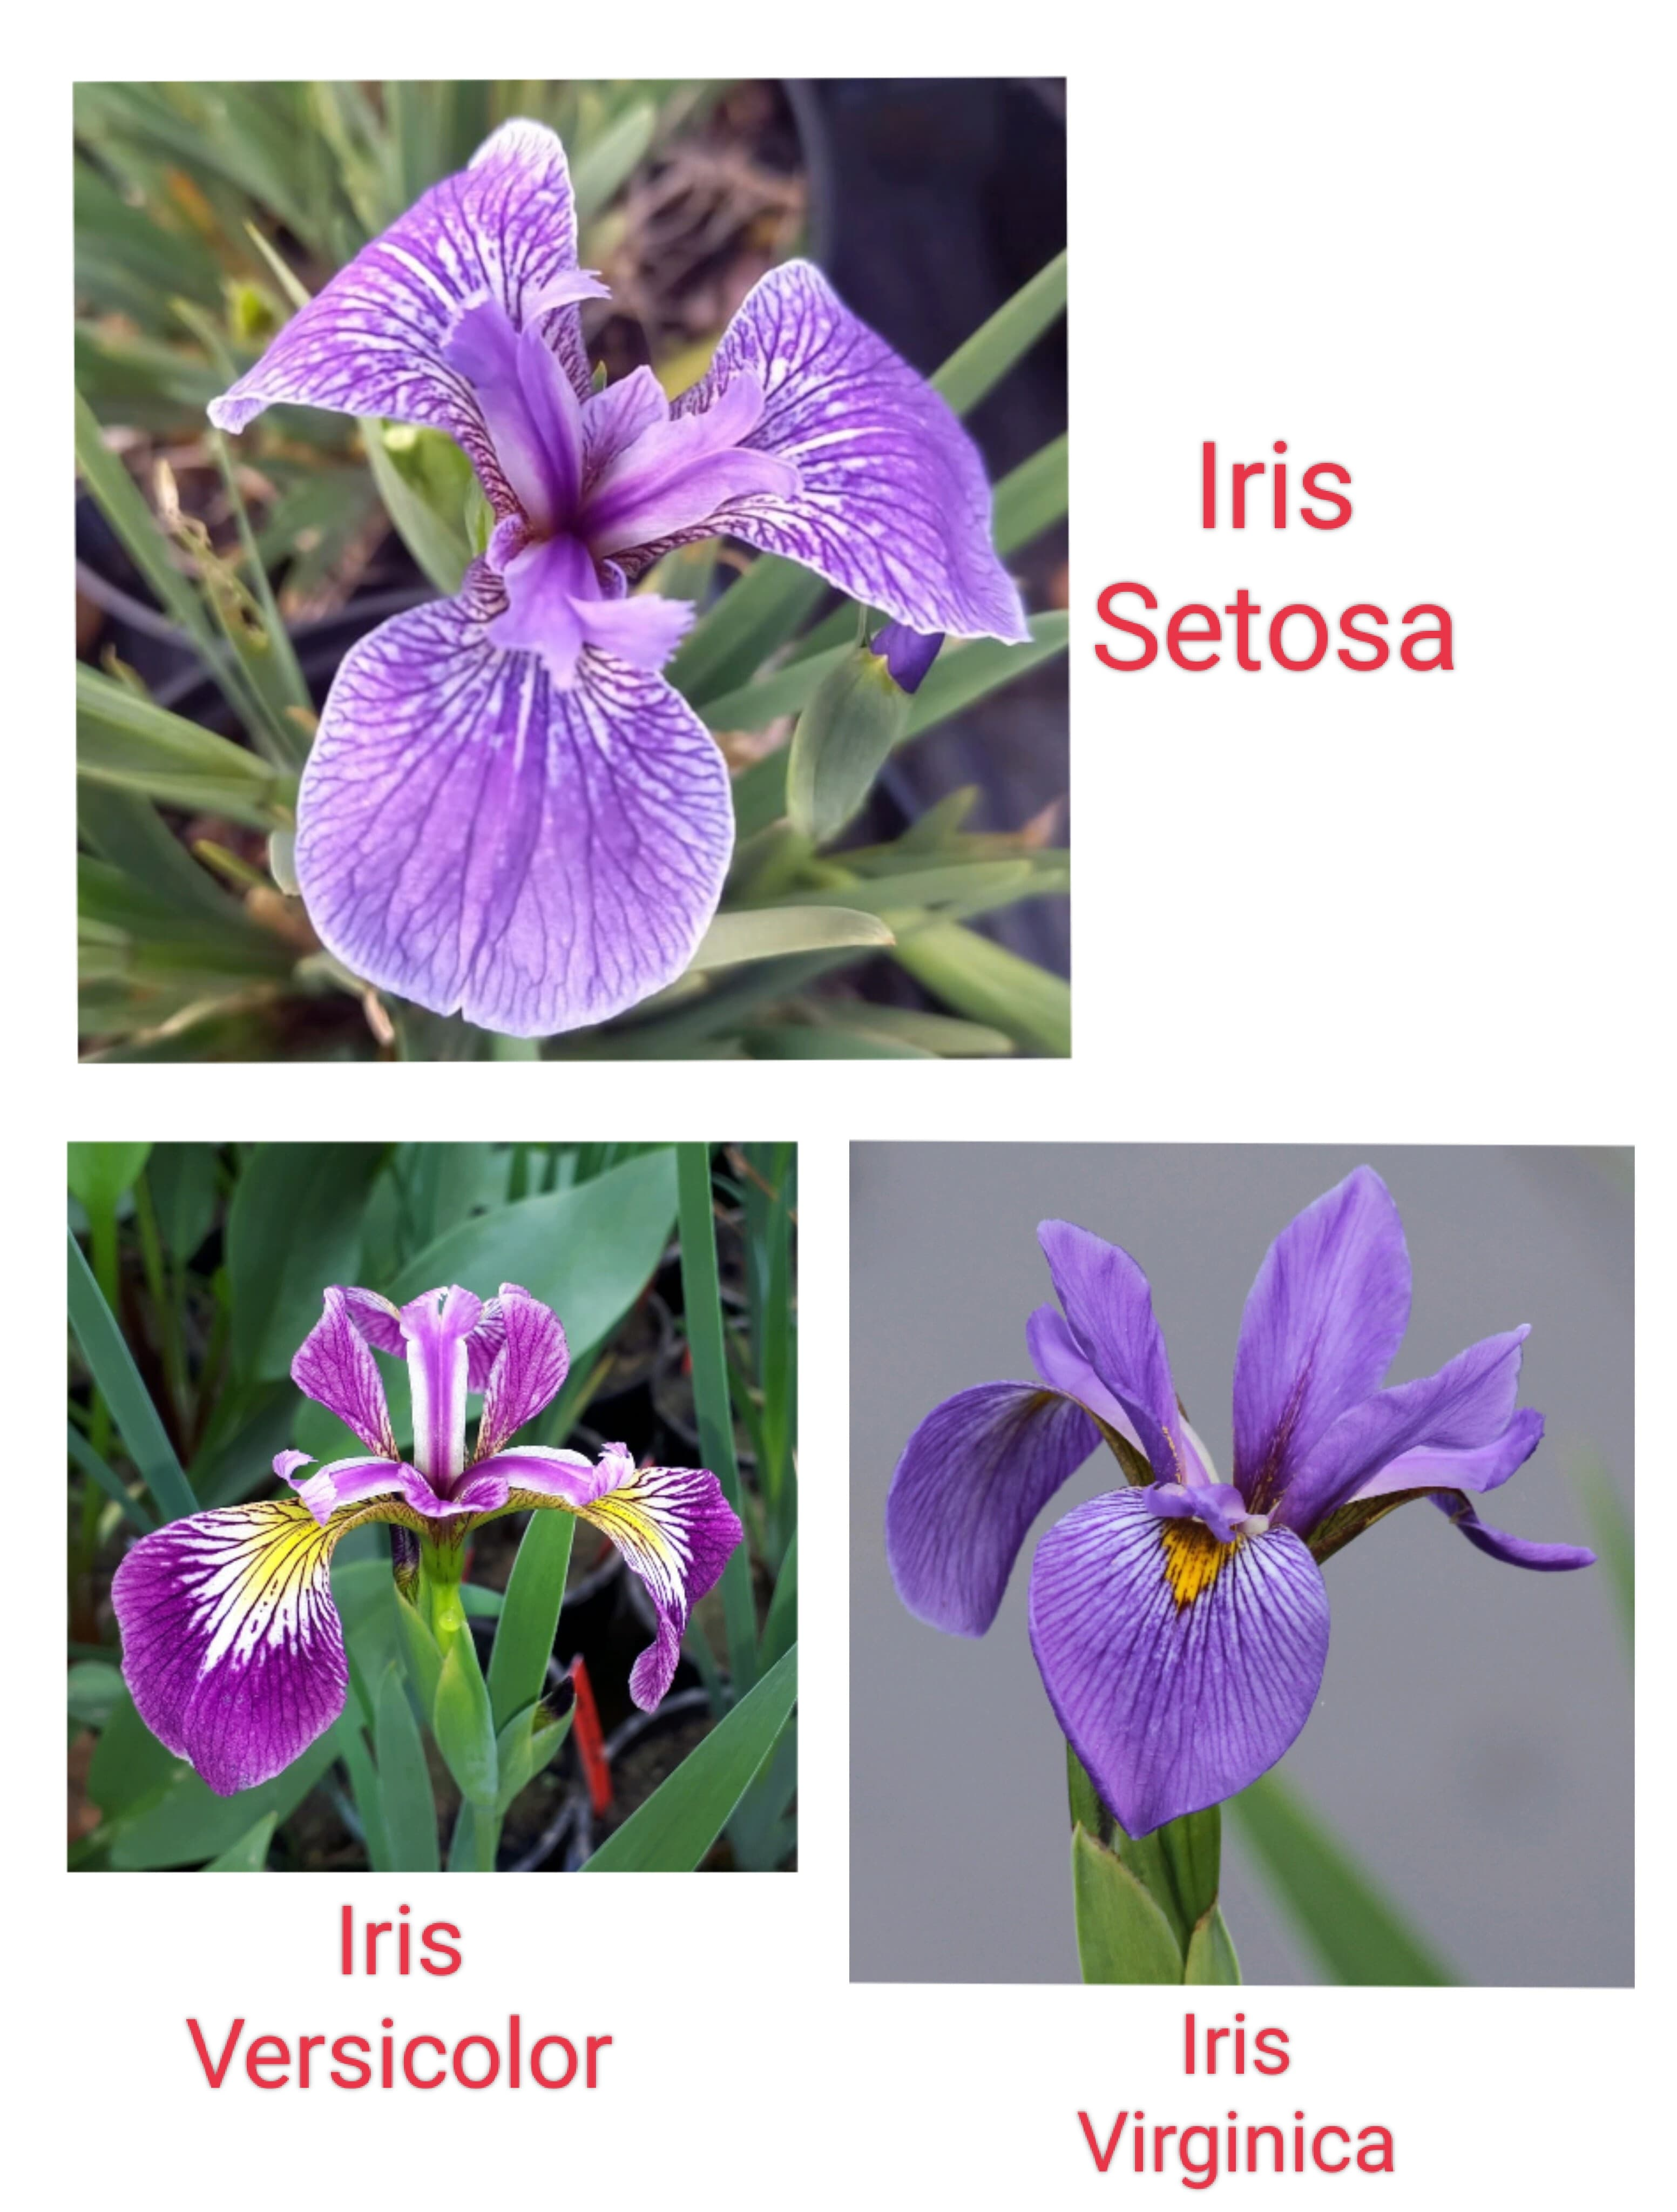

# Gathering, Processing and Cleaning the data

In [34]:
df=pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [37]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [38]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Plotting

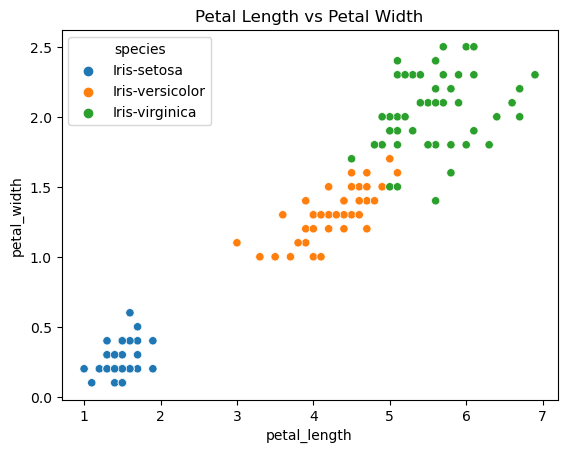

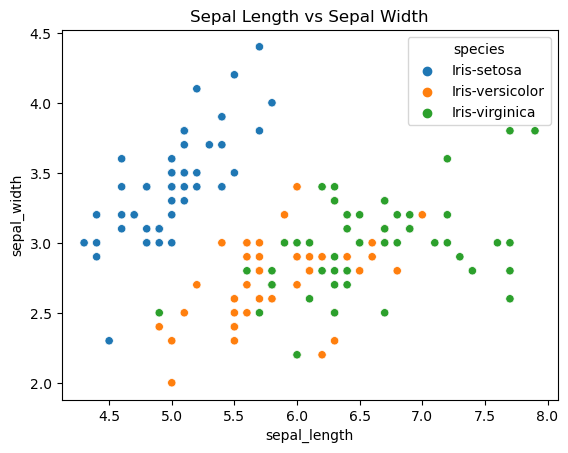

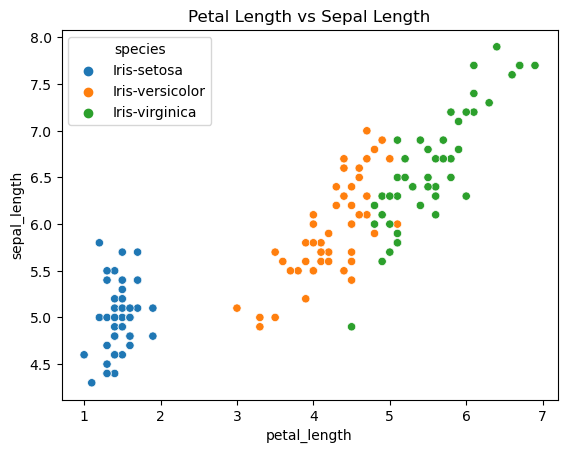

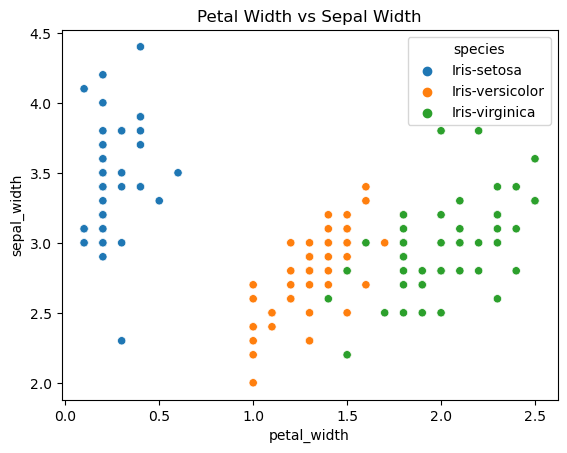

In [39]:
sb.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
pt.title('Petal Length vs Petal Width')
pt.show()

sb.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
pt.title('Sepal Length vs Sepal Width')
pt.show()

sb.scatterplot(x='petal_length', y='sepal_length', hue='species', data=df)
pt.title('Petal Length vs Sepal Length')
pt.show()

sb.scatterplot(x='petal_width', y='sepal_width', hue='species', data=df)
pt.title('Petal Width vs Sepal Width')
pt.show()

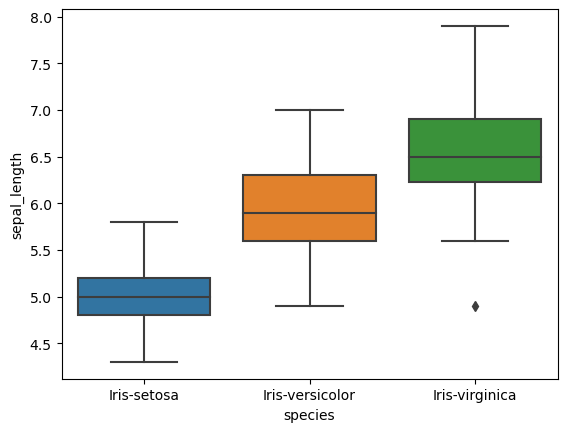

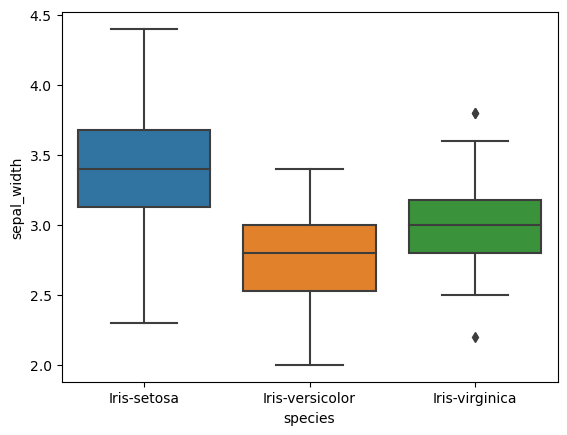

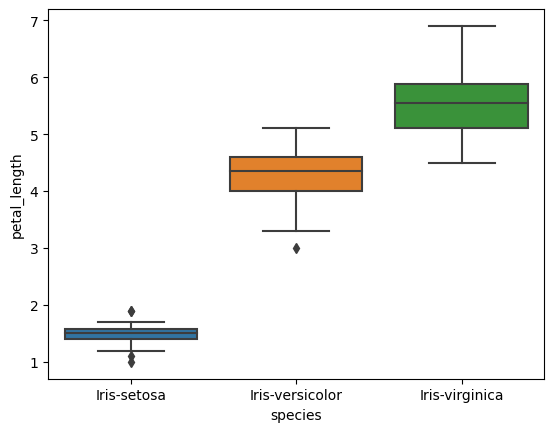

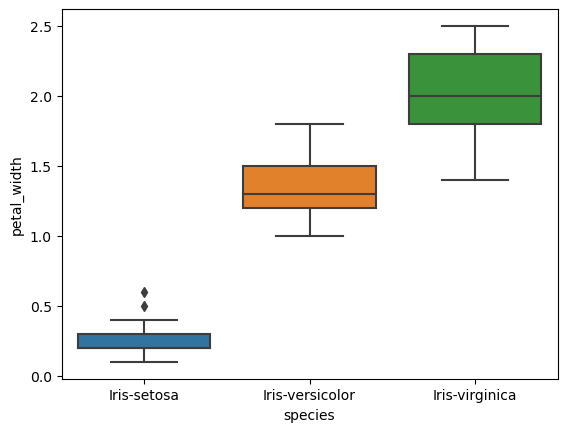

In [40]:
sb.boxplot(data=df,x='species', y='sepal_length')
pt.show()
sb.boxplot(data=df,x='species', y='sepal_width')
pt.show()
sb.boxplot(data=df,x='species', y='petal_length')
pt.show()
sb.boxplot(data=df,x='species', y='petal_width')
pt.show()

# Training and Testing using Logistic Regression

In [41]:
X= df[['sepal_length','sepal_width','petal_length','petal_width']]
y= df['species']

In [42]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [44]:
train, test = train_test_split(df, test_size = 0.2)# in this our main data is split into train and test
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train=80% and test=20%
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [45]:
# Do the train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
#  creating an instance for the LogisticRegression model
lr = LogisticRegression()

# Training the model on our train dataset
lr.fit(X,y)

# Training the model with the training set

lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
predictions = lr.predict(X)

# Compare with the actual charges

Scores = pd.DataFrame({'Actual':y,'Predictions':predictions})
Scores.head()

,Actual,Predictions
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa


# Accuracy %
Logistic Regression

In [48]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',accuracy_score(prediction,y_test)*100)

The accuracy of the Logistic Regression is 100.0


Decision Tree

In [49]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 1.0


# Training and Testing using MLP Classifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
clf = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

C:\Users\sanje\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, random_state=42)

In [52]:
y_pred = clf.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Metrics

In [54]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [55]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Prediction

In [56]:
pl = float(input('Enter petal length: '))
pw = float(input('Enter petal width: '))
sl = float(input('Enter sepal length: '))
sw = float(input('Enter sepal width: '))
print('The predicted iris flower is:' ,str(clf.predict([[pl, pw, sl, sw]])[0]))

Enter petal length: 1.5
Enter petal width: 2.9
Enter sepal length: 3.7
Enter sepal width: 4.5
The predicted iris flower is: Iris-virginica


C:\Users\sanje\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Thank You